<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Сергей, привет!👋</b>  

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Ты можешь реагировать на комментарии как просто написав их в Markdown-ячейках, так и выделив их цветом. Например, <font color='blue'>синим</font>. Второй способ, на мой взгляд, удобнее.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку! 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/datasets/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
df.loc[df['Tenure'].isna(), 'Tenure'] = df['Tenure'].median()

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Заменили отсутствуюшие значения на медианное

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Удалим столбцы, которые не нужны будут для модели

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [10]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
# Разбиваем Датасет
target = df['Exited']
features = df.drop('Exited', axis=1)

features_train, features_rest, target_train, target_rest = train_test_split(features, target, test_size=.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_rest, target_rest, test_size=.5, random_state=12345)
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [12]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Стандаритизируем признаки

В этом разделе мы изучили Датасет, заполнили отстутствующие значения,избавились от лишних столбцов и разделили выборку на обучающую, тестовую и валидационную

## Исследование задачи

Исследуем целевой признак. Чтобы оценить адекватность модели, проверим, как часто в целевом признаке Exited встречается класс «1» или «0».

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:xlabel='asasf', ylabel='asfasmf'>

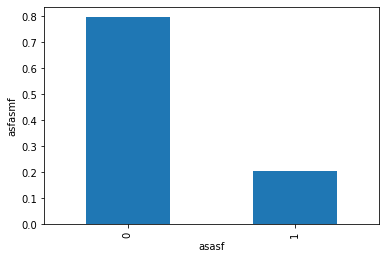

In [47]:
class_frequency = df['Exited'].value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind='bar', xlabel = 'asasf', ylabel = 'asfasmf')


In [19]:



model = LogisticRegression(random_state=1234, solver='liblinear')
model.fit(features_train, target_train)
predicted = model.predict(features_valid)
f1 = f1_score(target_valid, predicted)

probabilities = model.predict_proba(features_valid)
probabilities_one = probabilities[:,1]
auc_roc = roc_auc_score(target_valid, probabilities_one)
        
print('f1 score:', f1)
print('auc_roc:', auc_roc)

f1 score: 0.33108108108108103
auc_roc: 0.7587512627102753


модель Random Forest

In [15]:
best_f1 = 0
best_depth = 0
best_auc_roc = 0
best_est = 0
for est in range(1, 101, 10):    
    for depth in range(1,14, 2):    
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        model.fit(features_train, target_train)
        predicted = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted) 
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_est = est
            probabilities = model.predict_proba(features_valid)
            probabilities_one = probabilities[:,1]
            best_auc_roc = roc_auc_score(target_valid, probabilities_one) 
print('best depth:', best_depth)
print('best n_estimators:', est)
print('best_auc_roc:', best_auc_roc)
print('best_f1:', best_f1 )

best depth: 11
best n_estimators: 91
best_auc_roc: 0.8411276078369698
best_f1: 0.5852187028657616


Random Forest показывает результаты лучше, попробуем улучшить модель

## Борьба с дисбалансом

In [20]:

model = LogisticRegression(random_state=1234, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted = model.predict(features_valid)
f1 = f1_score(target_valid, predicted)

probabilities = model.predict_proba(features_valid)
probabilities_one = probabilities[:,1]
auc_roc = roc_auc_score(target_valid, probabilities_one)
        
print('f1 score:', f1)
print('auc_roc:', auc_roc)

f1 score: 0.4888507718696398
auc_roc: 0.7637310291013133


In [21]:
best_f1 = 0
best_depth = 0
best_auc_roc = 0
best_est = 0
for est in range(1, 101, 10):    
    for depth in range(1,14, 2):    
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted) 
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_est = est
            probabilities = model.predict_proba(features_valid)
            probabilities_one = probabilities[:,1]
            best_auc_roc = roc_auc_score(target_valid, probabilities_one) 
print('best depth:', best_depth)
print('best n_estimators:', est)
print('best_auc_roc:', best_auc_roc)
print('best_f1:', best_f1 )

best depth: 9
best n_estimators: 91
best_auc_roc: 0.8530432073748329
best_f1: 0.6285714285714286


Сбалансируем классы с помощью аргумента class_weight. Мера F1 улучшилась 

In [23]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [24]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [25]:
model = RandomForestClassifier(n_estimators=91, max_depth=9, random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid_downsampled = model.predict(features_valid)
f1_score(target_valid, predicted_valid_downsampled)

0.5902255639097744

In [27]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid_downsampled = model.predict(features_valid)
f1_score(target_valid, predicted_valid_downsampled)

0.48406546080964685

Уменьшение выборки дает результаты хуже. 
Для модели RandomForestClassifier нашли значения n_estimators и max_depth, при которых она будет показывать лучшие результаты.

In [28]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle( features_upsampled, target_upsampled,
                                                   random_state=12345)
    return features_upsampled, target_upsampled

In [31]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [32]:
model = RandomForestClassifier(n_estimators=91, max_depth=9, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid_upsampled = model.predict(features_valid)
f1_score(target_valid, predicted_valid_upsampled)

0.48941798941798936

In [33]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid_upsampled = model.predict(features_valid)
f1_score(target_valid, predicted_valid_downsampled)

0.48406546080964685

In [ ]:
Уменьшение и увеличение выборки дает результаты хуже,чем сбалансирование классов 
Для модели RandomForestClassifier нашли значения n_estimators и max_depth, при которых она будет показывать лучшие результаты.

Лучшие результаты показал способы борьбы с дисбалансом class_weight, применим его.

Работать дальше будем с моделью RandomForestClassifier со значением n_estimators = 91 и max_depth = 9

## Тестирование модели

In [36]:
model_final = RandomForestClassifier(random_state=12345, n_estimators=91, max_depth = 9, class_weight='balanced')
model_final.fit(features_train, target_train)
predicted_test = model_final.predict(features_test)
f1_score(target_test, predicted_test)

0.6084275436793423

Нужное значение F1 получено

In [35]:
#Посчитаем площадь под ROC-кривой для модели (AUC-ROC), чтобы узнать, насколько сильно ее точность отличается от случайной 
probabilities_valid_final = model_final.predict_proba(features_test)
probabilities_one_valid_final = probabilities_valid_final[:, 1]
roc_auc_score(target_test, probabilities_one_valid_final)

0.8551713385831493

Как видно, данный параметр вышел вполне добротным - получившаяся модель конечно не идеальна, и несколько далека от значения AUC-ROC = 1 , но заметно лучше, чем просто случайная модель со своими 0.5 , так что можно считать итоговую обученную модель вполне годной.

## Вывод ##

1) Ознакомились с данными и подготовили их к исследованию
2) Hазбили получившийся датасет на 3 выборки - обучающую, валидационную и тестовую, масштабировали признаки методом стандартизации
3) Применили различные способы борбы с дисбалансом - аргумент class_weight, уменьшение выборки. Лучшие результаты показал способы борьбы с дисбалансом class_weight. Выявили лучшие значения n_estimators и max_depth для модели случайного леса.
4) Обучили финальную модель и проверили ее на тестовой выборке. Достигли значения F1 = 0.608. Исследовали метрику AUC-ROC - ее значение в данном случае равно 0.85, что не так далеко от 1.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*